In [1]:
import numpy as np
import sys
sys.path.append("..")
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import sys

from missing_process.block_rules import *
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from tqdm import tqdm


In [2]:
real_datalist = ["banknote","concrete_compression",
            "wine_quality_white","wine_quality_red",
            "california","climate_model_crashes",
            "connectionist_bench_sonar","qsar_biodegradation",
            "yeast","yacht_hydrodynamics"
            ]
#real_datalist = ["yacht_hydrodynamics"]

syn_datalist = ["syn1"]
#real_datalist = ["banknote"]

#missingtypelist = ["quantile","diffuse","logistic"]
missingtypelist = ["logistic"]

seed = 1
nfold = 5



In [3]:
def load_origin_data(missingtypelist,datalist_name):
    '''
    create density plot
    '''
    

    if datalist_name == "real":
        datalist = real_datalist
    elif datalist_name == "syn":
        datalist = syn_datalist

    for missingtype in missingtypelist:
        if missingtype == "logistic":
            missing_rule = load_json_file("missing_rate.json")
        elif missingtype == "diffuse":
            missing_rule = load_json_file("diffuse_ratio.json")
        elif missingtype == "quantile":
            missing_rule = load_json_file("quantile_full.json")

        # load data and its mask
        for dataname in datalist:
            directory_path = f"../datasets/{dataname}"    
            norm_values = np.load(f'{directory_path}/{dataname}_norm.npy')
            
            print(dataname)


            for rule_name in missing_rule:
                observed_masks = np.load(f'{directory_path}/{missingtype}/{rule_name}.npy')


            return norm_values,observed_masks

In [4]:
def RMSE(mask,complete,imputed):
    missing_data_points = mask == 0

    # Extracting the originally missing data from both complete and imputed data
    original_values = complete[missing_data_points]
    imputed_values = imputed[missing_data_points]

    # Calculating RMSE
    rmse = np.sqrt(np.mean((original_values - imputed_values) ** 2))

    return rmse

def complete_computed_value(mask, complete, imputed):
    # Create an empty array with the same shape as 'complete' and 'imputed'
    computed = np.empty_like(complete)

    # Fill in the values
    computed[mask == 1] = complete[mask == 1]  # Use values from 'complete' where mask is 1
    computed[mask == 0] = imputed[mask == 0]   # Use values from 'imputed' where mask is 0

    return computed

def complete_computed_value(mask, complete, imputed):
    # Create an array filled with 'nan' with the same shape as 'complete' and 'imputed'
    computed = np.full_like(complete, np.nan, dtype=float)

    # Fill in the imputed values where mask is 0
    computed[mask == 0] = imputed[mask == 0]

    return computed

# Example usage
# mask, complete, and imputed should be numpy arrays of the same shape
# complete_computed = complete_computed_value(mask, complete, imputed)


def MAE(mask,complete,imputed):
    missing_data_points = mask == 0

    # Extracting the originally missing data from both complete and imputed data
    original_values = complete[missing_data_points]
    imputed_values = imputed[missing_data_points]

    # Calculating RMSE
    mae = np.mean(np.abs(original_values - imputed_values))

    return mae

In [5]:
def load_impute_data(missingtype,model_name,rule_name,dataname,fold,seed = 1):

    train_impute = np.load(f'../impute/{missingtype}/{dataname}/{model_name}/{rule_name}_seed-{seed}_{fold}_train.npy')
    test_impute = np.load(f'../impute/{missingtype}/{dataname}/{model_name}/{rule_name}_seed-{seed}_{fold}_test.npy')
    return train_impute,test_impute

def load_train_test(index_file,norm_values,observed_masks):  

    train_index = index_file["train_index"]
    test_index = index_file["test_index"]

    train_values = norm_values[train_index,:]

    train_masks = observed_masks[train_index,:]

    test_values = norm_values[test_index,:]

    test_masks = observed_masks[test_index,:]

    return train_values,train_masks,test_values,test_masks

  0%|          | 0/1 [00:00<?, ?it/s]

Overall Train RMSE 0.16861948
[13 11 19  8  6 14  1 15]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q1_Q2_0.5 tabcsdi 


Overall Train RMSE 0.18025857
[ 0 11 14  8  6 19 15  1]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q1_Q4_0.5 tabcsdi 


  0%|          | 0/1 [00:00<?, ?it/s]

Overall Train RMSE 0.104403056
[11 20 14 19  8  0 15  1]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q1_Q2_0.5 miwae 


Overall Train RMSE 0.16206858
[11  0 14  8  6 19 15  1]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q1_Q4_0.5 miwae 


Overall Train RMSE 0.14372341
[14  9  6 19  8  0 15  1]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q1_Q4_0.25 miwae 


Overall Train RMSE 0.06948683
[11 20 14  6 19  8 15  1]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q2_Q3_0.25 miwae 


Overall Train RMSE 0.27027977
[20 11 14  6 19  8  1 15]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q1_Q2_1.0 miwae 


  0%|          | 0/1 [00:00<?, ?it/s]

Overall Train RMSE 0.22989856
[13  1  8 11 19  6 14 15]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q1_Q2_0.5 notmiwae 


Overall Train RMSE 0.21304041
[13 11 14 19  8  6  1 15]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q1_Q4_0.5 notmiwae 


Overall Train RMSE 0.21137409
[ 9 11 14 19  6  8  1 15]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q1_Q4_0.25 notmiwae 


Overall Train RMSE 0.10994304
[20 13 14 11  6  8 19 15]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q2_Q3_0.25 notmiwae 


Overall Train RMSE 0.33643273
[20 14 11  1  6  8 19 15]
[0, 1, 2, 3, 4, 5, 6, 7, 20]
iterate
california_exp quantile Q1_Q2_1.0 notmiwae 


100%|██████████| 1/1 [00:32<00:00, 32.96s/it]


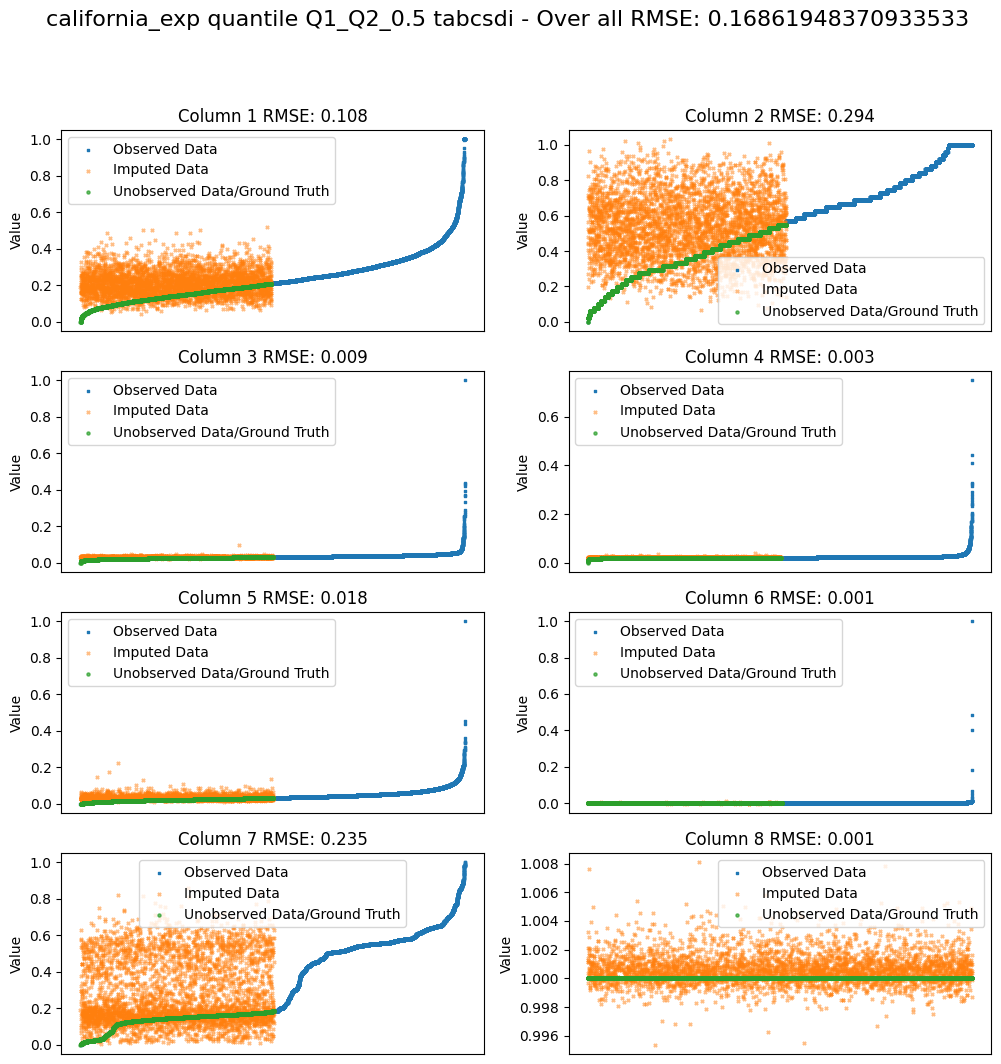

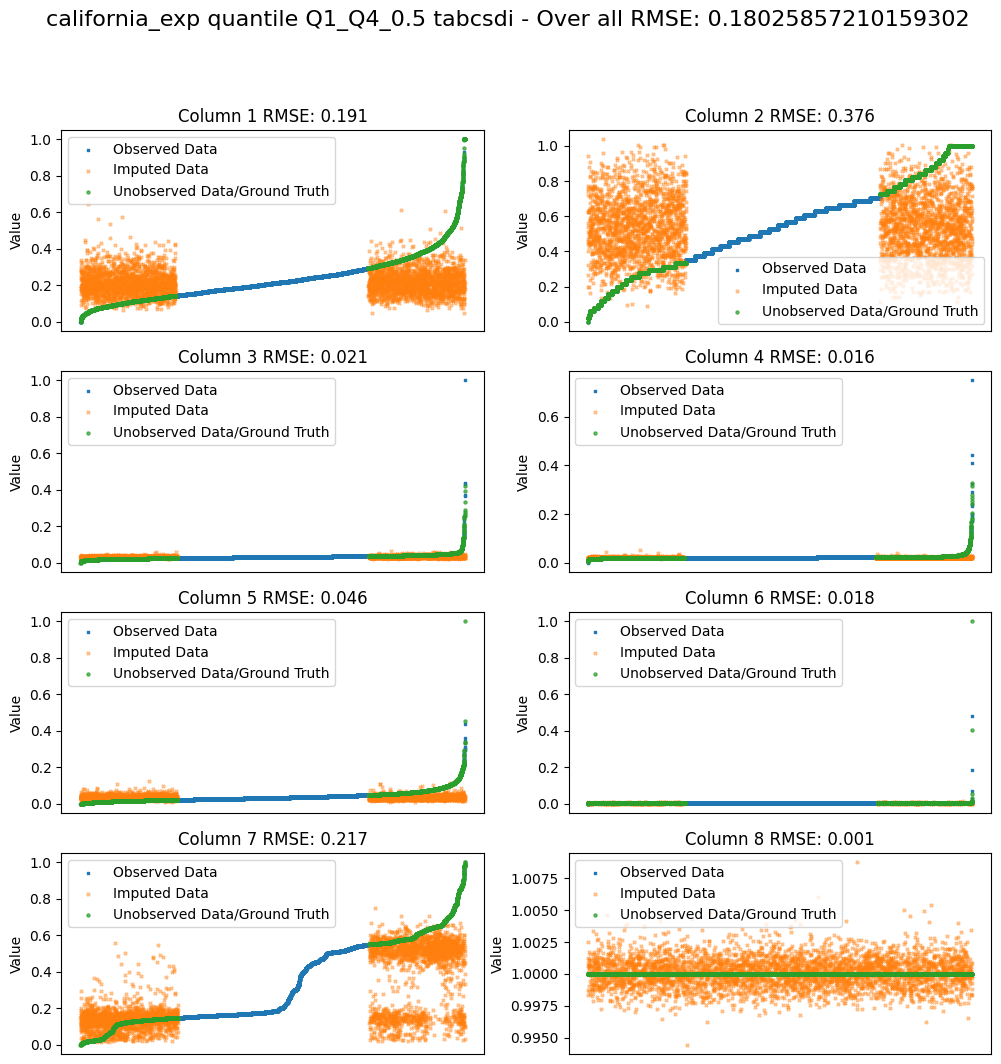

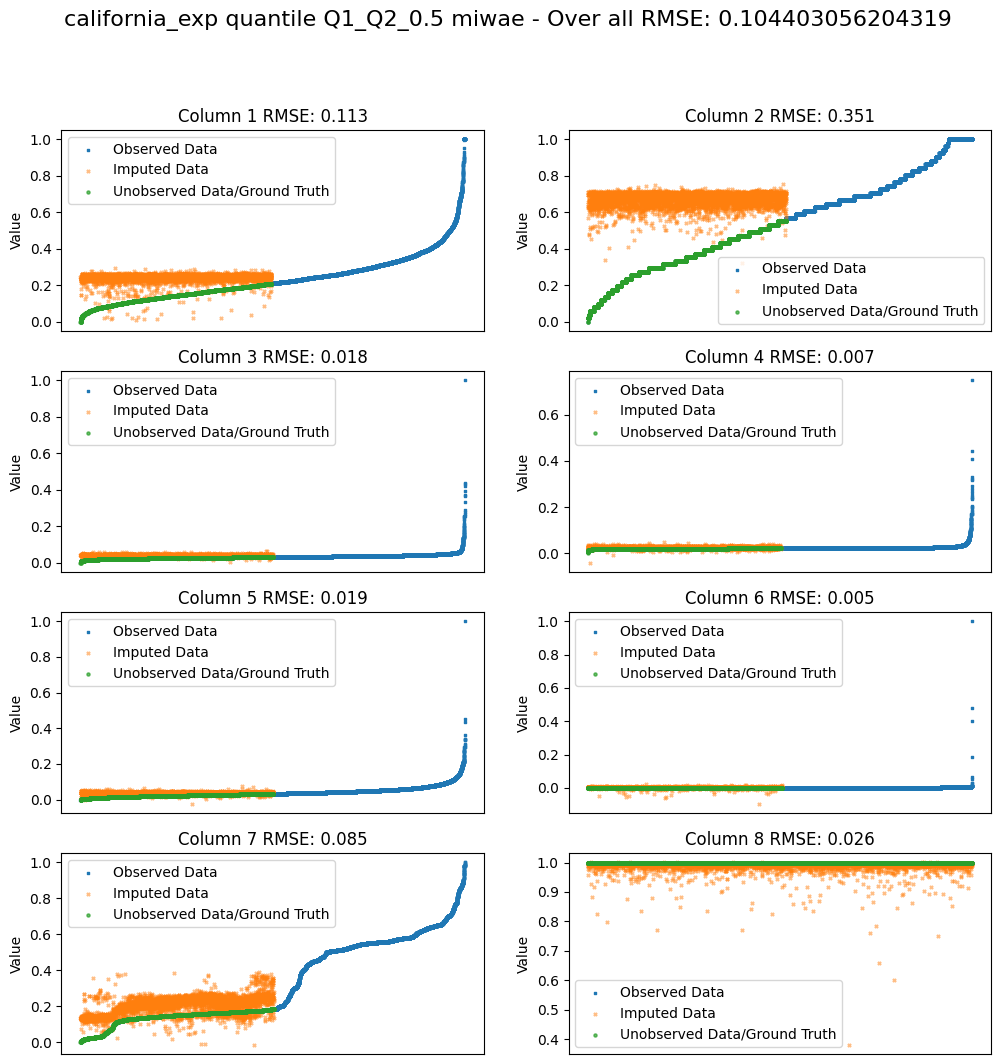

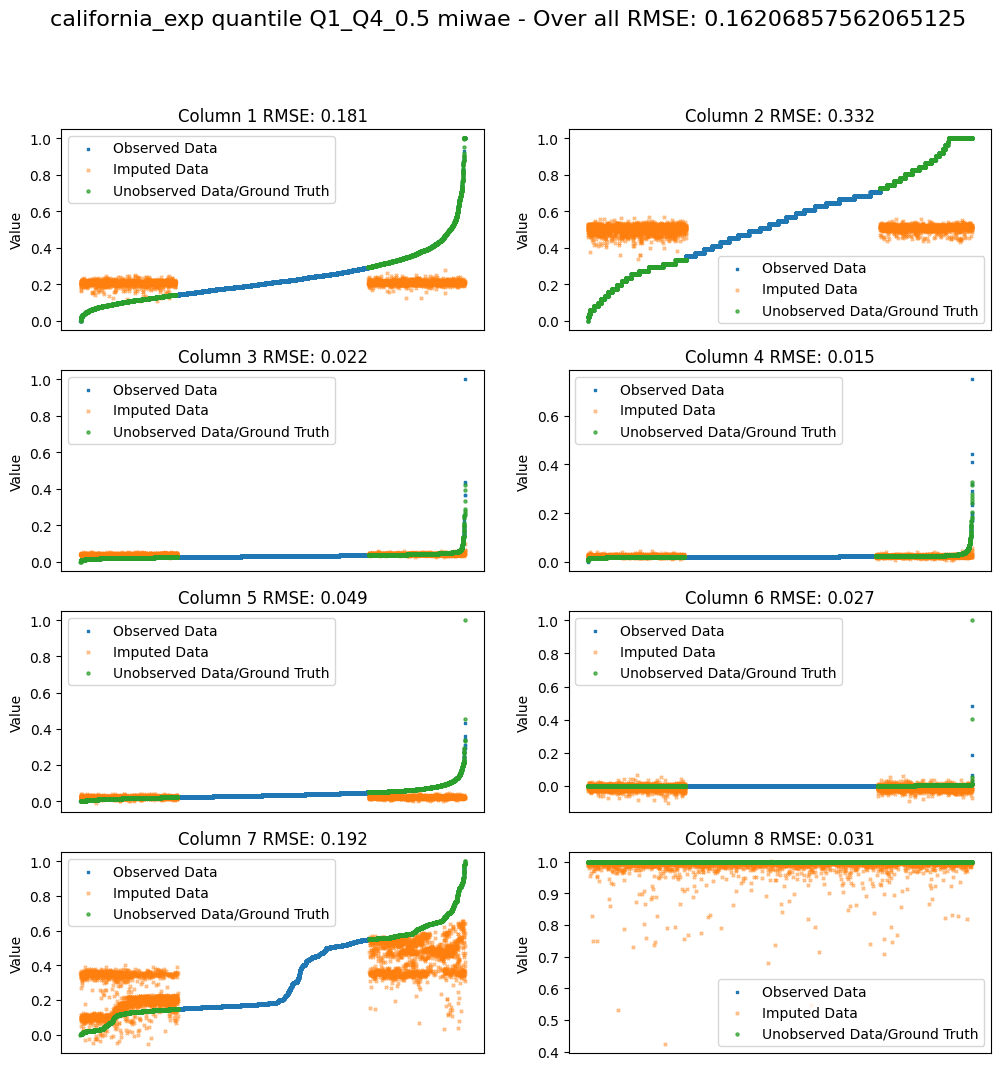

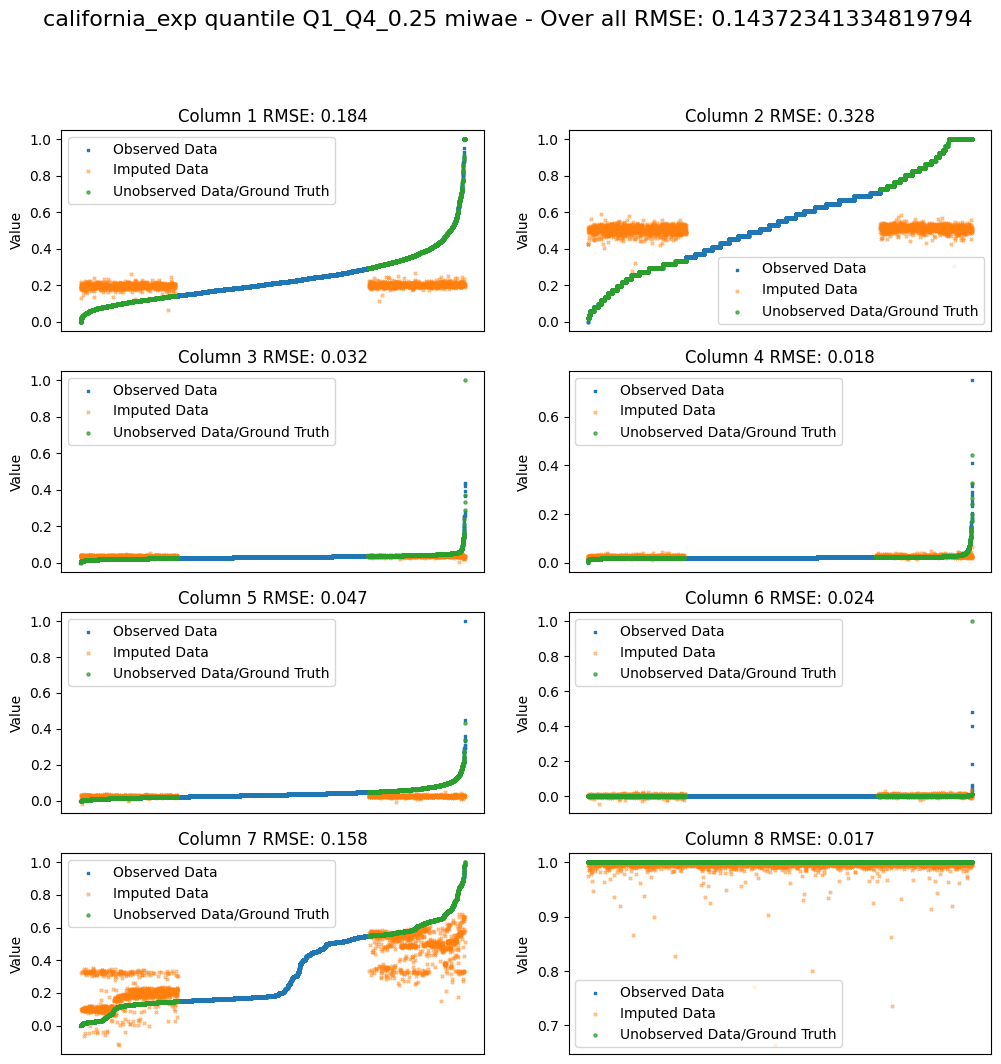

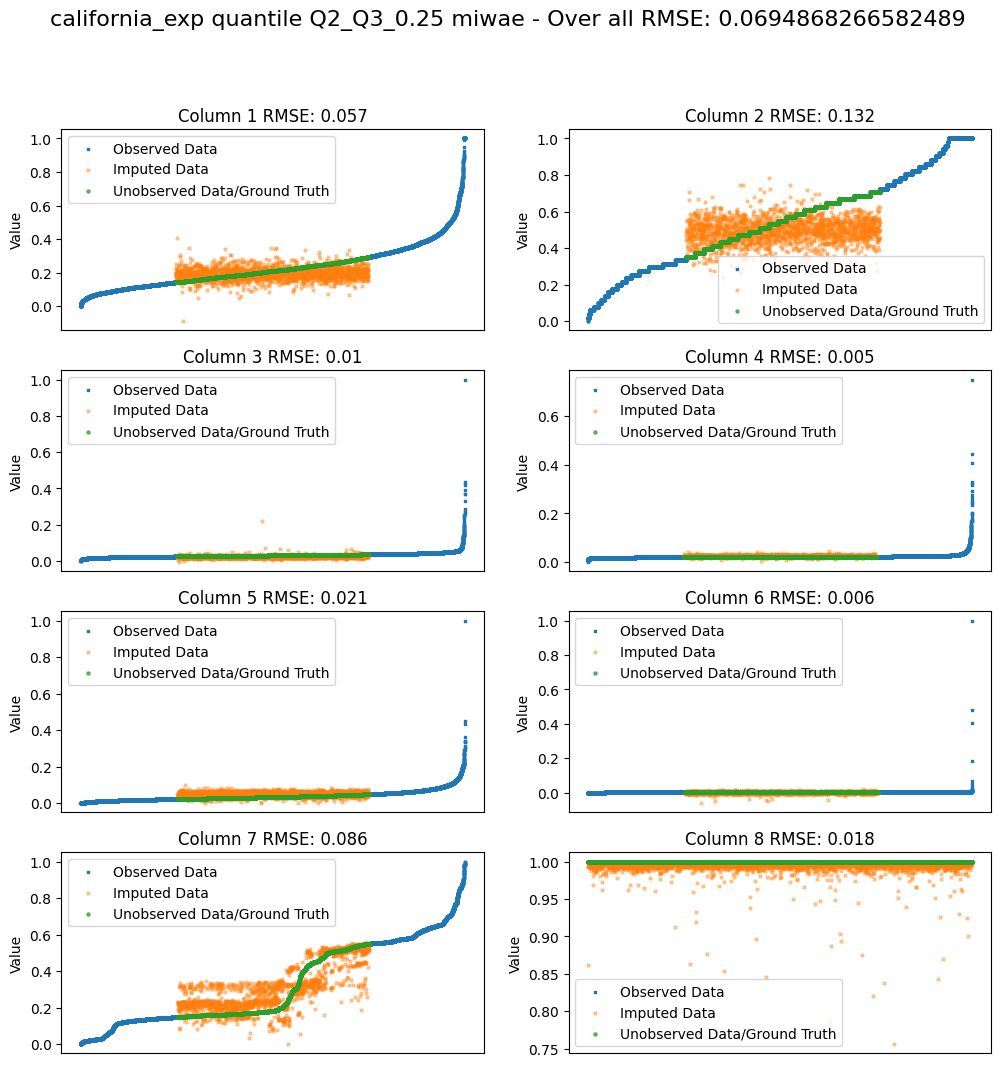

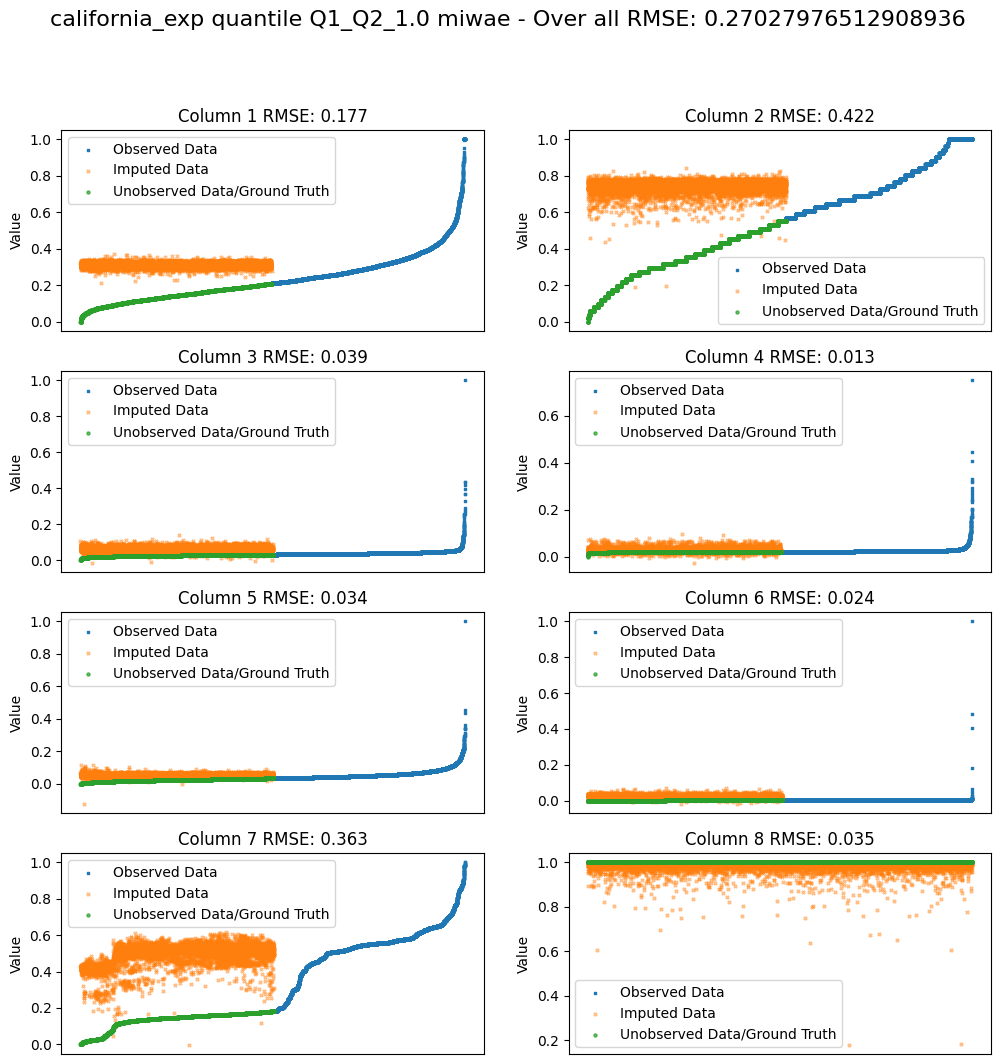

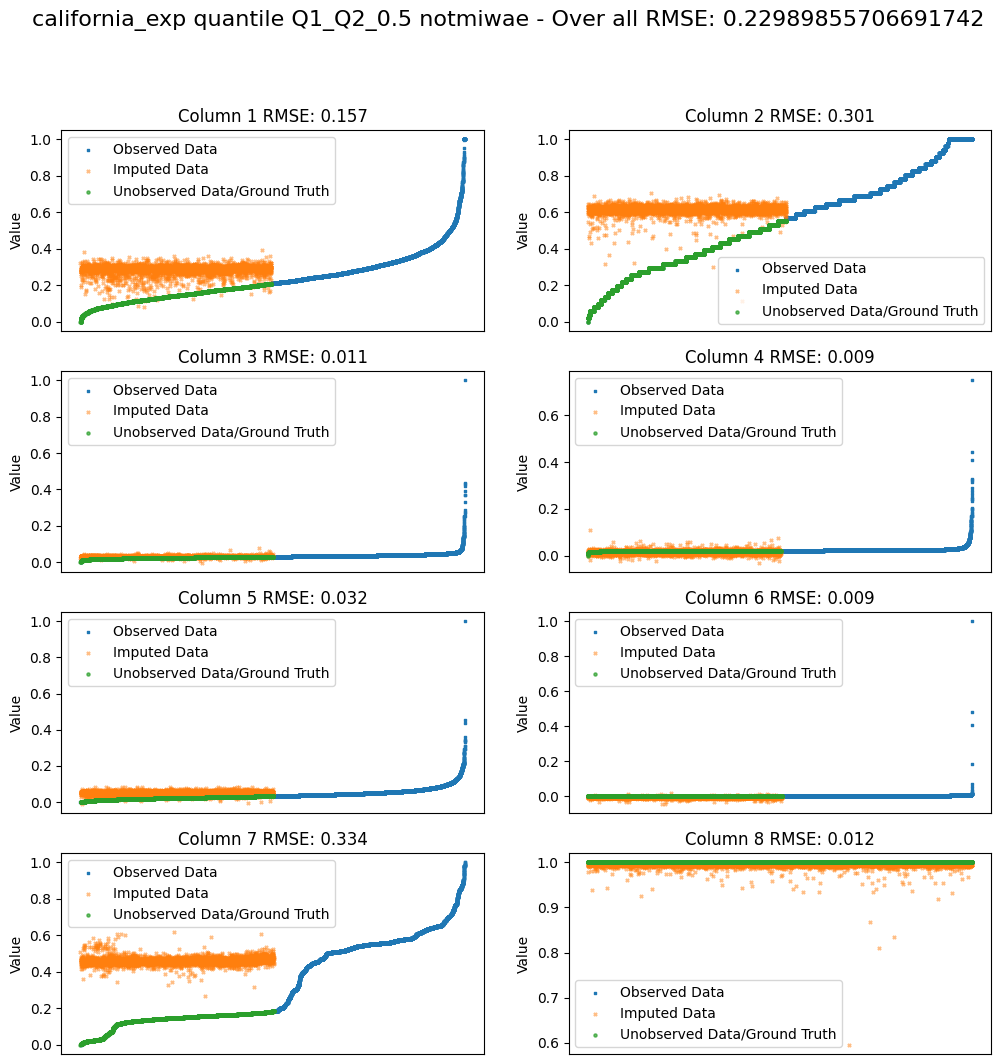

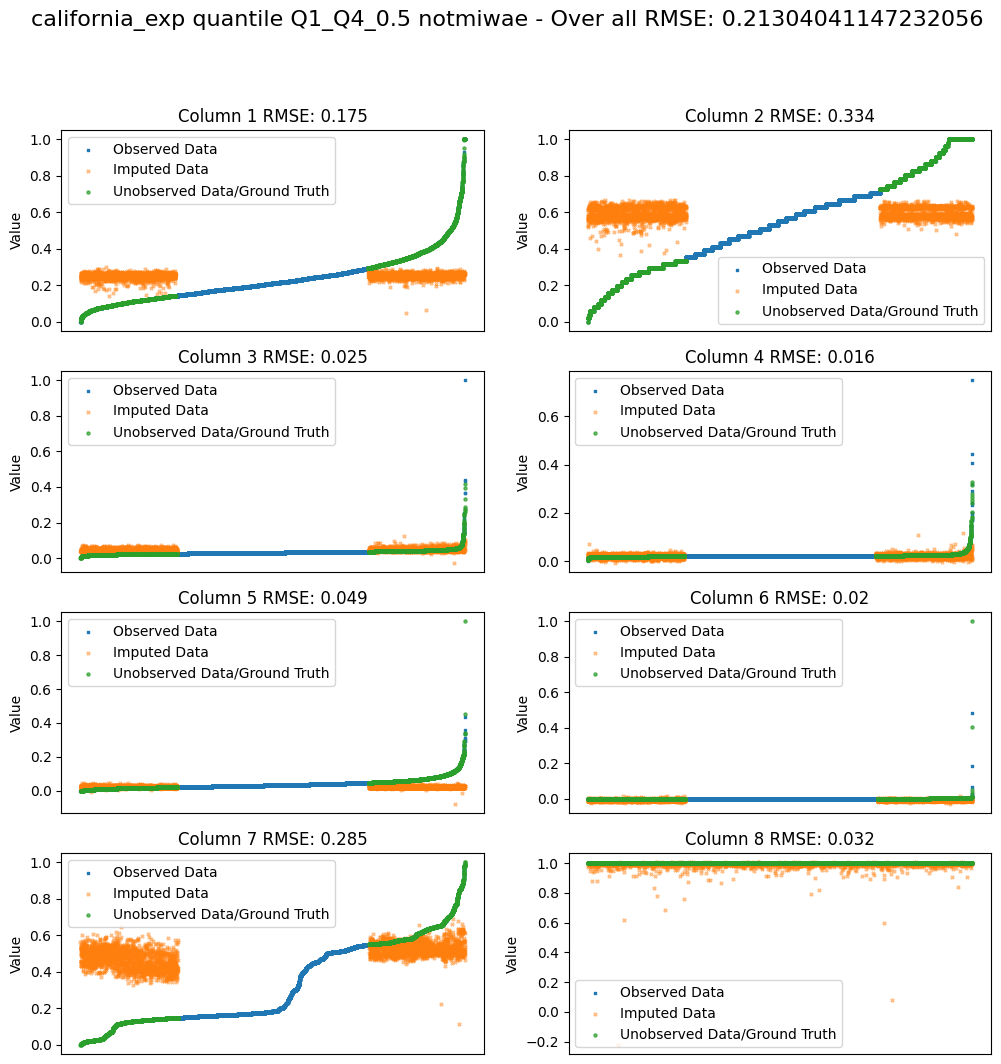

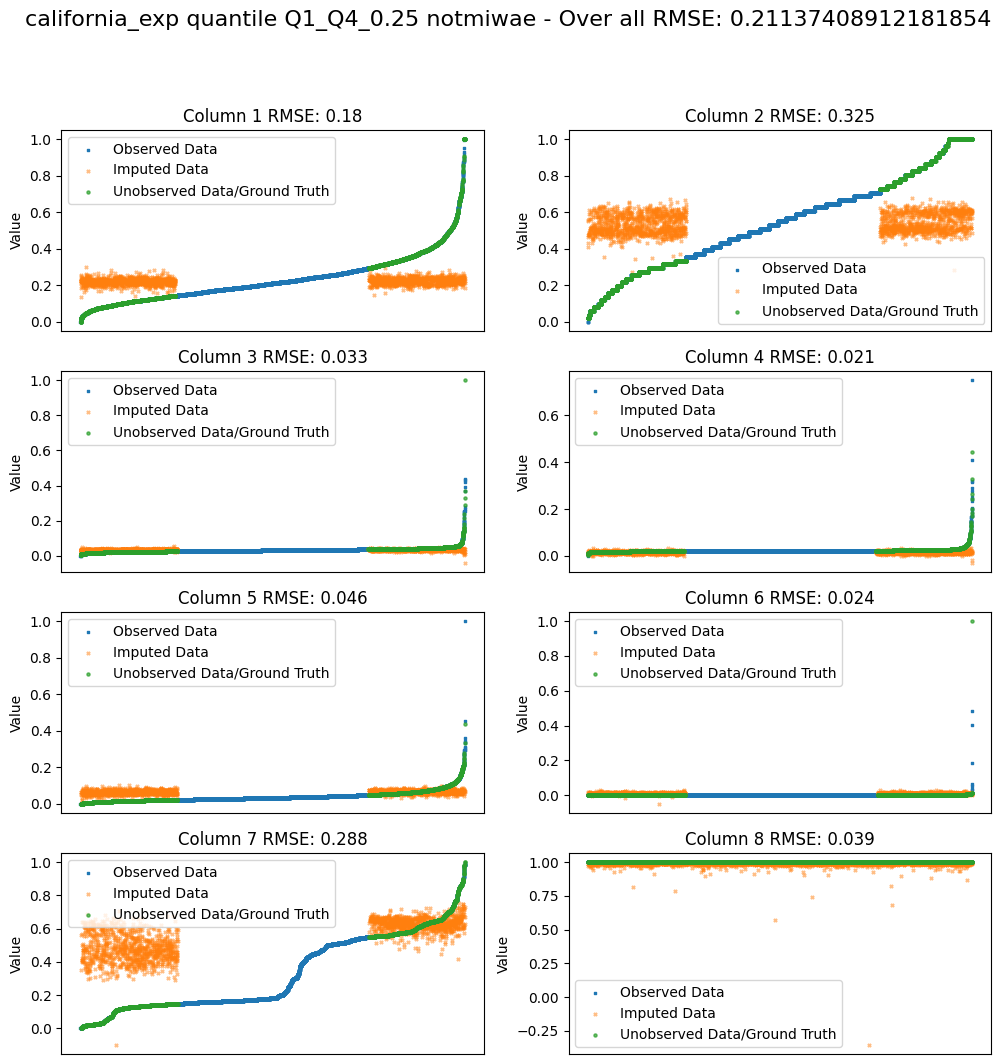

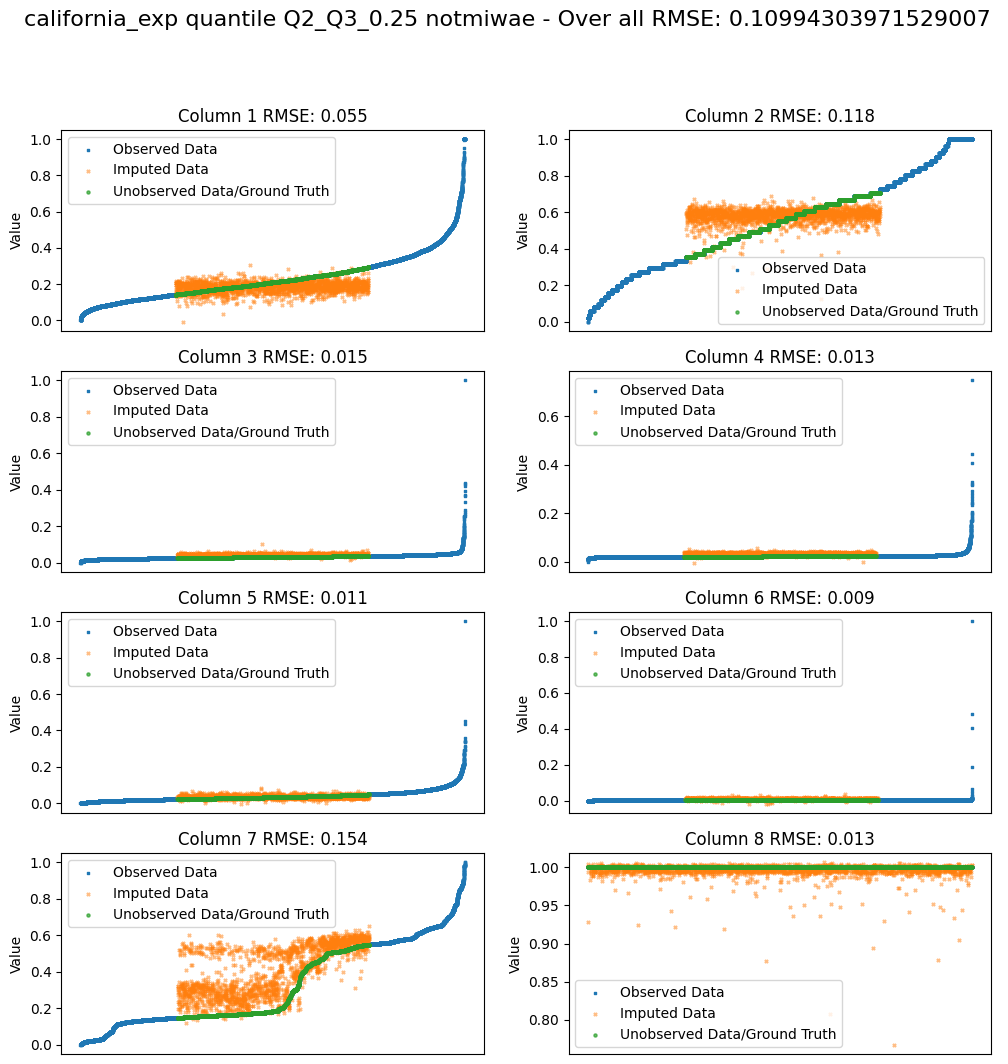

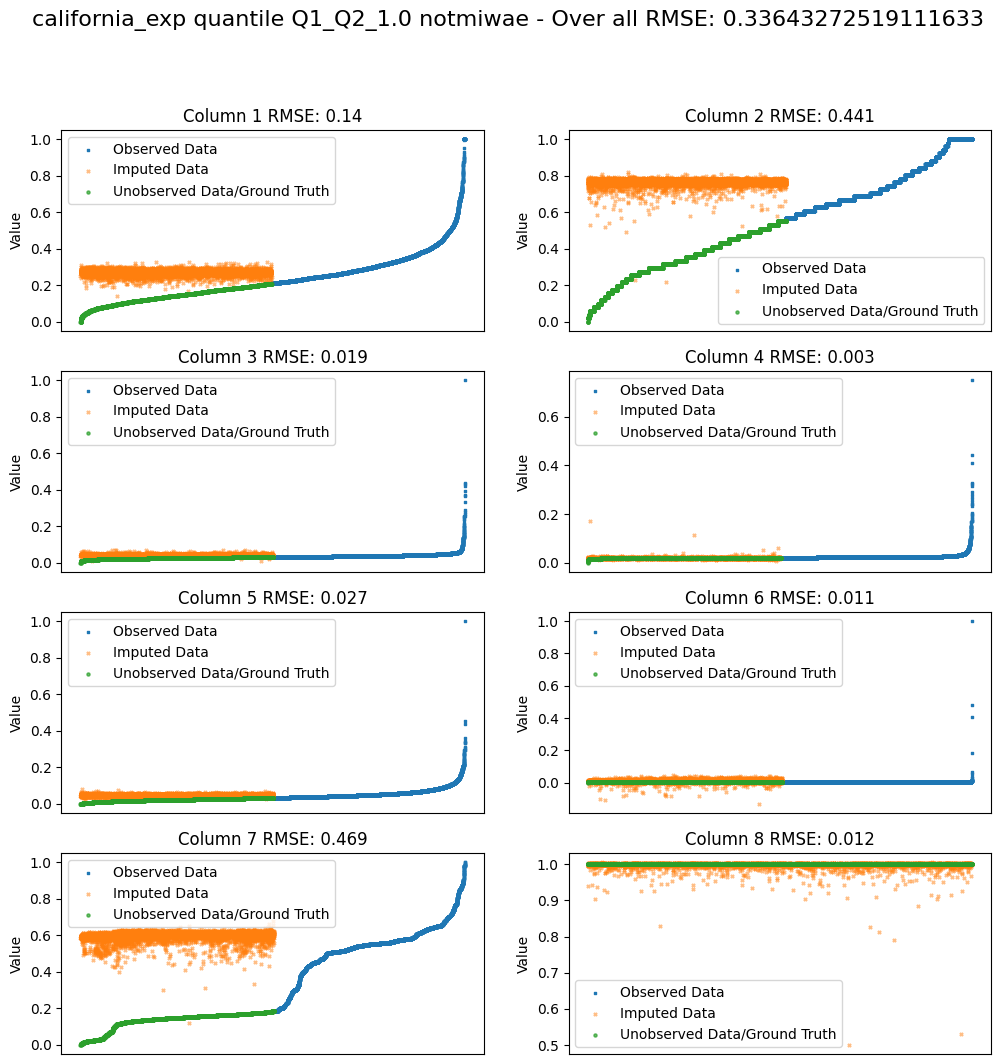

In [38]:
datalist = real_datalist
#datalist = syn_datalist

plot = True

modellist = ["mean","knn","mice","XGB","missforest","mf","hyper","gain","notmiwae","miwae","tabcsdi","ot"]
modellist = ["tabcsdi","miwae","notmiwae"]
#modellist = ["tabcsdi"]
missingtypelist = ["test_MNAR_2"]
#missingtypelist = ["logistic"]
datalist = ["california_exp"]
for model_name in modellist:
    cal_rmse_plot(missingtypelist,model_name,datalist)
                

            
        


In [37]:
def cal_rmse_plot(missingtypelist,model_name,datalist):
    quantilelist = ["Q1_Q2_0.5","Q1_Q4_0.5","Q2_Q4_0.5","Q1_Q2_1.0","Q1_Q4_1.0","Q2_Q4_1.0"]
    for missingtype in missingtypelist:
        if missingtype == "logistic":
            missing_rule = load_json_file("missing_rate.json")
        elif missingtype == "diffuse":
            missing_rule = load_json_file("diffuse_ratio.json")
        elif missingtype == "quantile":
            missing_rule = load_json_file("quantile_full.json")
        elif missingtype == "test_MNAR_1":
            missing_rule = load_json_file(f"{missingtype}.json")
            missingtype = "logistic"
        elif missingtype == "test_MNAR_2":
            missing_rule = load_json_file(f"{missingtype}.json")
            missingtype = "quantile"

        # load data and its mask
        for dataname in tqdm(datalist):
            directory_path = f"../datasets/{dataname}"    
            norm_values = np.load(f'{directory_path}/{dataname}_norm.npy')
            f = open(f'{directory_path}/split_index_cv_seed-{seed}_nfold-{nfold}.json')
            index_file = json.load(f)
            

            for rule_name in tqdm(missing_rule):
                #if (rule_name in ["0.8"] and missingtype == "diffuse") or (rule_name in ["0.5"] and missingtype == "logistic") or (rule_name in quantilelist and missingtype == "quantile"):
                if True:
                    observed_masks = np.load(f'{directory_path}/{missingtype}/{rule_name}.npy')

                    for fold in index_file:
                        index = index_file[fold]
                        train_values,train_masks,test_values,test_masks = load_train_test(index,norm_values,observed_masks)
                        

                        try:
                            impute_train,impute_test  = load_impute_data(missingtype,model_name,rule_name,dataname,fold)
                            

                            train_rmse = RMSE(train_masks,train_values,impute_train)
                            train_mae = MAE(train_masks,train_values,impute_train)

                            test_rmse = RMSE(test_masks,test_values,impute_test)
                            test_mae = MAE(test_masks,test_values,impute_test)
                    
                            if train_rmse > 0 and plot:
                                print("Overall Train RMSE",train_rmse)
                                rmse = RMSE_columnwise(train_masks,train_values,impute_train)
                                #make_line_plot(train_values,impute_train,train_masks,title = f"{dataname} {missingtype} {rule_name} {model_name} - Over all RMSE: {train_rmse} ",subtitle=rmse)
                                make_line_plot_cali(train_values,impute_train,train_masks,title = f"{dataname} {missingtype} {rule_name} {model_name} - Over all RMSE: {train_rmse} ",subtitle=rmse)
                        except:
                            pass
                        break


In [7]:
def RMSE_columnwise(mask, complete, imputed):


    # Initializing an array to store RMSE for each column
    rmse_per_column = np.zeros(complete.shape[1])

    # Iterate over each column
    for i in range(complete.shape[1]):
        missing_data_points = mask[:, i] == 0
        # Extracting the originally missing data from both complete and imputed data
        original_values = complete[missing_data_points, i]
        imputed_values = imputed[missing_data_points, i]

        # Calculating RMSE for this column
        rmse_per_column[i] = np.sqrt(np.mean((original_values - imputed_values) ** 2))

    return np.nan_to_num(rmse_per_column, nan=0)

In [8]:
# def make_plot(norm_value,impute,mask, title = None,subtitle = None):

#     indices = np.argsort(subtitle)[-8:]

#     # Sorting the indices and converting to a list
#     sorted_indices = np.sort(indices).tolist()

#         # Create a 4x2 grid of subplots
#     fig, axes = plt.subplots(4, 2, figsize=(12, 12))
#     axes = axes.ravel()  # Flatten the 4x2 grid for easy iteration

#     impute_value = impute
#     nan_mask = np.where(mask == 0, np.nan, mask)
#     masked_value_na = norm_value * nan_mask
    
    

#     for i in range(len(sorted_indices)):
#         norm_column = norm_value[:, sorted_indices[i]]
#         impute_column = impute_value[:, sorted_indices[i]]
#         mask_column_na = masked_value_na[:, sorted_indices[i]]

        
#         bins = np.histogram_bin_edges([norm_column, impute_column], bins='auto')
#         #data_column2 = array_list[1][i]
#         # Histogram
#         #axes[i].hist(data_column, bins=30, alpha=0.7, edgecolor='black',kde = True)
#         sns.histplot(data=norm_column, bins=bins, color='orange',alpha = 0.4, ax=axes[i], kde=True, label='Complete Data',
#                      #hatch="", 
#                      fill=False
#                      )
#         sns.histplot(data=mask_column_na, bins=bins, color='blue',alpha = 0.1, ax=axes[i], kde=True, label='Observed Data',
#                      #hatch="/", 
#                      #fill=False
#                      )
#         sns.histplot(data=impute_column, bins=bins, color='green',alpha = 0.6, ax=axes[i], kde=True, label='Imputed Data',
#                      hatch='...', 
#                      fill=False
#                      )
#         axes[i].set_xlabel('Value')
#         axes[i].set_ylabel('Frequency')
#         if subtitle[i]:
#             axes[i].set_title(f'Column {sorted_indices[i]+1} RMSE: {round(subtitle[sorted_indices][i],3)}')
#         else:
#             axes[i].set_title(f'Column {sorted_indices[i]+1}')
#         axes[i].legend()

#     if title is not None:
#         fig.suptitle(title, fontsize=16)
#         # Adjust the layout
#     plt.tight_layout()
#     plt.savefig(f"../plot/histo/{title}.png")
#     plt.show()

In [32]:
def make_line_plot(norm_value,impute,mask, title = None,subtitle = None):

    indices = np.argsort(subtitle)[-8:]

    # Sorting the indices and converting to a list
    sorted_indices = np.sort(indices).tolist()

        # Create a 4x2 grid of subplots
    fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    axes = axes.ravel()  # Flatten the 4x2 grid for easy iteration

    impute_value = complete_computed_value(mask, norm_value, impute)
    true_value = complete_computed_value(mask, norm_value, norm_value)
    nan_mask = np.where(mask == 0, np.nan, mask)
    masked_value_na = norm_value * nan_mask
    
    

    for i in range(len(sorted_indices)):
        norm_column = norm_value[:, sorted_indices[i]]
        impute_column = impute_value[:, sorted_indices[i]]
        mask_column_na = masked_value_na[:, sorted_indices[i]]
        true_column = true_value[:, sorted_indices[i]]
        # Sorting based on norm_column
        sorted_index = np.argsort(norm_column)
        norm_column_sorted = norm_column[sorted_index]
        impute_column_sorted = impute_column[sorted_index]
        mask_column_na_sorted = mask_column_na[sorted_index]
        true_column_sorted = true_column[sorted_index]

        # axes[i].scatter(range(len(norm_column_sorted)), norm_column_sorted, label='Complete Data', color="orange", alpha=1, s=50, marker='s')  # Circle marker
        axes[i].scatter(range(len(mask_column_na_sorted)), mask_column_na_sorted, label='Observed Data', 
                        #color='blue', 
                        alpha=1, 
                        s=1, 
                        marker='s'
                        )  # Square marker
        axes[i].scatter(range(len(impute_column_sorted)), impute_column_sorted, label='Imputed Data', 
                        #color='green', 
                        alpha=0.5, 
                        s=5, 
                        marker='x'
                        )  # Triangle marker
        axes[i].scatter(range(len(true_column_sorted)), true_column_sorted, label='Unobserved Data/Ground Truth', 
                        #color='red', 
                        alpha=0.7, 
                        s=5, 
                        marker='o'
                        )  # Triangle marker
            # sns.histplot(data=impute_column, color='green',alpha = 0.6, ax=axes[i], kde=True, label='Imputed Data',
        #              hatch='...', 
        #              fill=False
        #              )

        #axes[i].set_ylim(-1, 1)
        #axes[i].set_xlabel('Index')
        axes[i].set_xticks([])
        axes[i].set_ylabel('Value')
        
        if subtitle[i]:
            axes[i].set_title(f'Column {sorted_indices[i]+1} RMSE: {round(subtitle[sorted_indices][i],3)}')
        else:
            axes[i].set_title(f'Fully Observed Column {sorted_indices[i]+1}')
        axes[i].legend()

    if title is not None:
        fig.suptitle(title, fontsize=16)
        # Adjust the layout
    title = title.split("-")[0]
    plt.tight_layout()
    plt.savefig(f"../plot/scatter/{title}.png")
    plt.show()

In [36]:
def make_line_plot_cali(norm_value,impute,mask, title = None,subtitle = None):

    indices = np.argsort(subtitle)[-8:]
    print(indices)
    indices = [0,1,2,3,4,5,6,7,20]
    
    # Sorting the indices and converting to a list
    sorted_indices = np.sort(indices).tolist()
    print(sorted_indices)
        # Create a 4x2 grid of subplots
    #fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    axes = axes.ravel()  # Flatten the 4x2 grid for easy iteration
    fig.suptitle(title, fontsize=16)
    impute_value = complete_computed_value(mask, norm_value, impute)
    true_value = complete_computed_value(mask, norm_value, norm_value)
    nan_mask = np.where(mask == 0, np.nan, mask)
    masked_value_na = norm_value * nan_mask
    
    print("iterate")
    title = title.split("-")[0]
    print(title)

    for i in range(len(sorted_indices)):
        norm_column = norm_value[:, sorted_indices[i]]
        impute_column = impute_value[:, sorted_indices[i]]
        mask_column_na = masked_value_na[:, sorted_indices[i]]
        true_column = true_value[:, sorted_indices[i]]
        # Sorting based on norm_column
        sorted_index = np.argsort(norm_column)
        norm_column_sorted = norm_column[sorted_index]
        impute_column_sorted = impute_column[sorted_index]
        mask_column_na_sorted = mask_column_na[sorted_index]
        true_column_sorted = true_column[sorted_index]

        # axes[i].scatter(range(len(norm_column_sorted)), norm_column_sorted, label='Complete Data', color="orange", alpha=1, s=50, marker='s')  # Circle marker
        axes[i].scatter(range(len(mask_column_na_sorted)), mask_column_na_sorted, label='Observed Data', 
                        #color='blue', 
                        alpha=1, 
                        s=1, 
                        marker='s'
                        )  # Square marker
        axes[i].scatter(range(len(impute_column_sorted)), impute_column_sorted, label='Imputed Data', 
                        #color='green', 
                        alpha=0.5, 
                        s=5, 
                        marker='x'
                        )  # Triangle marker
        axes[i].scatter(range(len(true_column_sorted)), true_column_sorted, label='Unobserved Data/Ground Truth', 
                        #color='red', 
                        alpha=0.7, 
                        s=5, 
                        marker='o'
                        )  # Triangle marker
            # sns.histplot(data=impute_column, color='green',alpha = 0.6, ax=axes[i], kde=True, label='Imputed Data',
        #              hatch='...', 
        #              fill=False
        #              )

        #axes[i].set_ylim(-1, 1)
        #axes[i].set_xlabel('Index')
        axes[i].set_xticks([])
        axes[i].set_ylabel('Value')
        
        if subtitle[i]:
            axes[i].set_title(f'Column {sorted_indices[i]+1} RMSE: {round(subtitle[sorted_indices][i],3)}')
        else:
            axes[i].set_title(f'Fully Observed Column {sorted_indices[i]+1}')
        axes[i].legend()
            # Adjust the layout
        plt.savefig(f"../plot/scatter/cali_exp/{title}.png")